In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

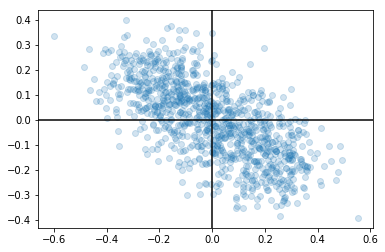

In [2]:
# That you see the same what I see
np.random.seed(42)
N = 1000

# Generate random data
x = np.linspace(-.3, .3, N)
np.random.shuffle(x)
y = -.7 * x

x += np.random.randn(x.size) / 10
y += np.random.randn(y.size) / 10

# Plot random data, and see that it is 0 centered.
plt.plot(x, y, 'o', alpha=.2)
plt.axhline(0, c='k')
plt.axvline(0, c='k')

In [3]:
# Initialize some random weights
w = np.array([0.1, 0.4]) 

# Training iterations
N = 1000

# "Learning rate"
eta = 0.1

# Save weights over time
ws = []

# Training
for i in range(N):
    # Pre-synaptic activity
    rPre  = np.asarray([x[i], y[i]])
    # Post-synaptic activity dot(w, rPre)
    rPost = w @ rPre
    # Update weights according to Oja's rule
    w = w + eta * rPost * (rPre - rPost * w)
    
    # Store weights
    ws.append(w)

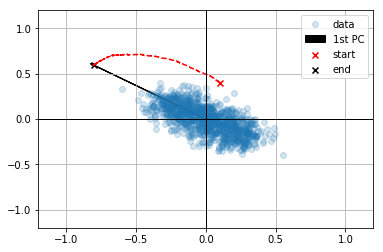

In [4]:
# Convert weights to numpy array
ws = np.asarray(ws)

plt.figure()
ax = plt.subplot(111)
# Plot weight course
plt.plot(ws[:,0], ws[:,1], 'r--')

# Plot start and end of the weights
plt.scatter(ws[0, 0], ws[0,1], c='r', marker='x', label='start')
plt.scatter(ws[-1, 0], ws[-1,1], c='k', marker='x', label='end')

# Plot the underlying data
plt.plot(x, y, 'o', alpha=.2, label='data')

# Show that it is zero centered
plt.axhline(0, c='k', lw=1)
plt.axvline(0, c='k', lw=1)

# Plot first principal component
arr = plt.arrow(0, 0, *ws[-1],head_width=.02, color='k', label='1st PC')
ax.add_patch(arr)

# Plot legend, grid and appropriate borders
plt.legend()
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2,1.2])
plt.grid(True)

Code idea from Trappenberg "Fundamentals of Computational Neuroscience" with plenty of adjustments